In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Newspaperdata.csv")

In [4]:
data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [6]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


# Checking whether the data is normally distributed or not

In [7]:
import seaborn as sns

In [8]:
import warnings 
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='daily', ylabel='Density'>

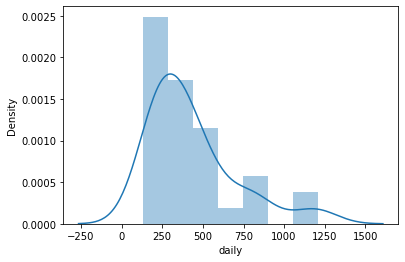

In [9]:
sns.distplot(data['daily'])

<AxesSubplot:xlabel='sunday', ylabel='Density'>

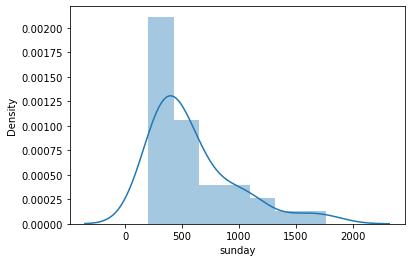

In [10]:
sns.distplot(data['sunday'])      #If both the i/p and o/p variables are positively skewed this means there is a strong relationshop between these two variables. 

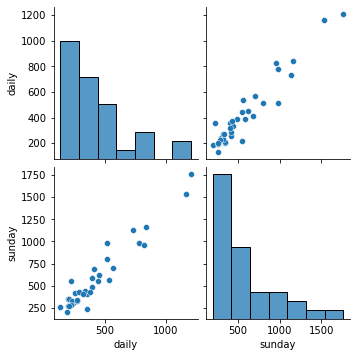

In [11]:
sns.pairplot(data)

# Fitting a linear regression model

In [12]:
# We will use OLS method to built the model. OLS is ordinary least square method. After Building the model we will check for R^2 value and adjusted R^2 value, we want the less difference between the R^2 value and the adjusted R^2 value so this is the reason we are using OLS method to build a model. 

In [13]:
import statsmodels.formula.api as smf
model = smf.ols('sunday~daily',data=data).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

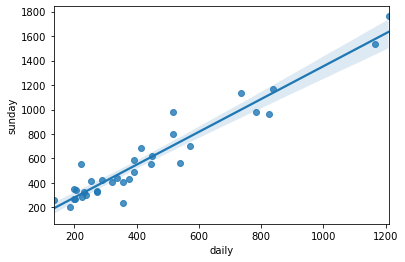

In [14]:
sns.regplot(x = 'daily',y = 'sunday',data=data)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           6.02e-19
Time:                        12:28:24   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [18]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

# Calculation of predicted value for a new data points

In [19]:
# Suppose I want to find the sunday predicted value for 35th and 36th record and in that daily(i/p) values are 200 and 300, I am suppose to follow the below steps. 

In [26]:
# First I will create a series of data
new_predict = pd.Series([392,517])

In [27]:
# Converting the series of data into dataframe format
data_predict = pd.DataFrame(new_predict,columns=['daily'])

In [28]:
model.predict(data_predict)      # predicted values are calculated for the data points which were not present in the original data

0    539.003815
1    706.468160
dtype: float64